In [1]:
import pandas as pd
import numpy as np

file = "aes_data.xlsx"

data = pd.read_excel(file)

df = data.drop([0,1,2], axis=0)
cols_fillna = df.columns.values
for col in cols_fillna[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    
pump_in_cols = df.columns.values[1:6]
pump_out_cols = df.columns.values[6:11]
pump_mass_cols = df.columns.values[11:16]

    
# df[cols_fillna[-1]][df[cols_fillna[-1]].isnull()]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()


,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,10LAB15CP003_XQ01,10LAB11CF001_XQ01,10LAB12CF001_XQ01,10LAB13CF001_XQ01,10LAB14CF001_XQ01,10LAB15CF001_XQ01,10LAB00FT902_XQ01,10LAC11CE021_XQ01,10LAC12CE021_XQ01,10LAC13CE021_XQ01,10LAC14CE021_XQ01,10LAC15CE021_XQ01,10LAC11CS001A_XQ01,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
0,NaN,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание
1,NaN,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост F ПИТ В НАП ПИТ НАС 0-500 КГ/С,дост F ПИТ В НАП ПИТ НАС 0-500 КГ/С,дост F ПИТ В НАП ПИТ НАС 0-500 КГ/С,дост F ПИТ В НАП ПИТ НАС 0-500 КГ/С,дост F ПИТ В НАП ПИТ НАС 0-500 КГ/С,дост ВЧСЛ СИГН Т ПИТВ Д 0-200 ГРАД,дост ТОК 10LAC11AP001 0-600 А,дост ТОК 10LAC12AP001 0-600 А,дост ТОК 10LAC13AP001 0-600 А,дост ТОК 10LAC14AP001 0-600 А,дост ТОК 10LAC15AP001 0-600 А,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост U НА СЕКЦ BBA 0-13 КВ,дост U НА СЕКЦ BBB 0-13 КВ,дост U НА СЕКЦ BBC 0-13 КВ,дост U НА СЕКЦ BBD 0-13 КВ,дост -100-1500 MBT,дост Среднее значение мощности реактора
2,NaN,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,кг/с,кг/с,кг/с,кг/с,кг/с,°C,A,A,A,A,A,об/мин,об/мин,об/мин,об/мин,об/мин,кВ,кВ,кВ,кВ,МВт,МВт
3,01.01.19 00:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,9.5,-1,293,383,1,343,167,0,282,290,1,280,0,2995,2994,0,2995,10.5,10.2,10.5,10.4,576,1803
4,01.01.19 01:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,9.5,-1,294,383,1,342,167,0,278,290,1,277,0,2995,2996,0,2995,10.5,10.2,10.5,10.4,575,1795


In [2]:
import matplotlib.pyplot as plt
import pandas as pd


x, y = df['10LAB11CP002_XQ01'].min(), df['10LAB11CP002_XQ01'].max()

plot_df = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')

df1 = (plot_df - plot_df.mean())/plot_df.std()

df1.head()


3   -0.032401
4   -0.032401
5   -0.032401
6   -0.032401
7   -0.032401
Name: 10LAB11CP002_XQ01, dtype: float64

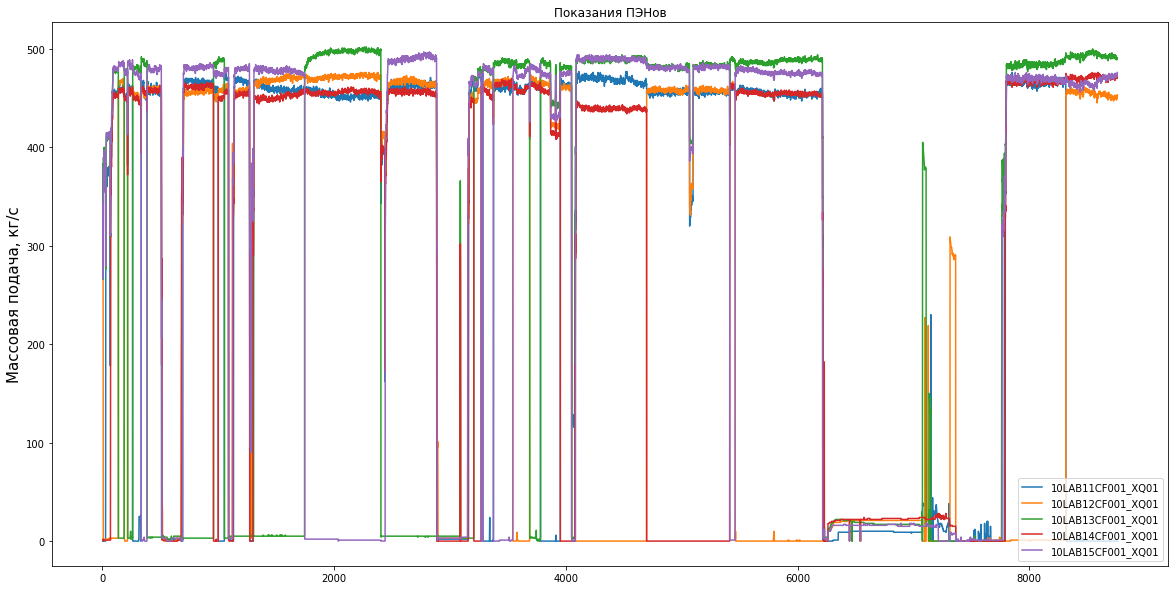

In [3]:
# df["10LAB13CP002_XQ01"] = df.loc[df["10LAB13CP002_XQ01"]>8, "10LAB13CP002_XQ01"].apply(lambda x: x-x//1)


df["10LAB13CP002_XQ01"] = df["10LAB13CP002_XQ01"].apply(lambda x: x if x<=8 else x-x//1)   


for col in df.columns.values[1:]:
    df[col] = df[col].apply(lambda x: 0 if x<0 else x)


# pump_columns = ["10LAB11CP002_XQ01","10LAB12CP002_XQ01","10LAB13CP002_XQ01","10LAB14CP002_XQ01","10LAB15CP002_XQ01"]
pump_columns = ["10LAB11CF001_XQ01","10LAB12CF001_XQ01","10LAB13CF001_XQ01","10LAB14CF001_XQ01","10LAB15CF001_XQ01"]

for col in pump_columns:
    df[col] = df[col].apply(lambda x: x if x<510 else 0)    
    


plt.rcParams["figure.figsize"] = (20,10)

plot = df.plot(use_index=True, y=pump_columns)
plt.title('Показания ПЭНов')
plt.ylabel('Массовая подача, кг/с', fontsize=15)
plt.legend(loc='lower right')
plt.show()


In [147]:
## segment1 = df[pump_mass_cols[0]].plot()
# segment2 = df[pump_in_cols[0]][100:200]

# concated = pd.concat([segment1, segment2])

# concated.plot()




def divide_to_segments(column, limiter):
    segm_start = None
    segm_end = None

    segments = []

    for ind,item in df[column].iteritems():
        if item>limiter:
            if segm_start is None:
                segm_start = ind
        else:
            if segm_start is not None and ind != segm_start:
                segm_end = ind

        if segm_start is not None and segm_end is not None:
            segments.append((segm_start,segm_end))
            segm_start, segm_end = None, None
    
    return segments
        
segments = divide_to_segments(pump_mass_cols[0], 440)

pd.concat([df[pump_mass_cols[0]][i[0]-2:i[1]-3] for i in segments],  ignore_index=True).reset_index().plot(ylim=[380, 500],x='index')


# df[pump_mass_cols[0]][250:260].plot()
# df[pump_mass_cols[0]][250:260]


# df[pump_mass_cols[0]][26]


# df[df[pump_mass_cols[0]]>440][pump_mass_cols[0]].reset_index().plot(x='index')





SyntaxError: invalid syntax (<ipython-input-147-a94d47836b9b>, line 11)

In [98]:
plot_df2 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')

df2 = (plot_df2-plot_df2.mean())/plot_df2.std()
df2.head()

3   -0.453021
4   -0.458913
5   -0.469224
6   -0.811712
7   -0.822760
Name: 10JKS00FU901_XQ01, dtype: float64

In [6]:
# plt.plot(df.reset_index()['index'], df2)

In [7]:
# v1 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')[:3000]
# v2 = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')[:3000]



# np.cov(v1.to_numpy().T,v2.to_numpy().T, rowvar=0)

np.cov(df1.to_numpy()[:].T,df2.to_numpy()[:].T, rowvar=0)




array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [8]:
np.corrcoef(df1.to_numpy()[:], df2.to_numpy()[:])

array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [9]:
np.correlate(df1,df2)

array([6949.62987013])

In [10]:
filtered_df = df1[df1.isnull()]

In [11]:
print(filtered_df)

Series([], Name: 10LAB11CP002_XQ01, dtype: float64)


In [12]:
filtered_df = df2[df2.isnull()]
print(filtered_df)

Series([], Name: 10JKS00FU901_XQ01, dtype: float64)


In [13]:
# df2 = df2.apply(lambda x: x*2)
# df2
from iapws import IAPWS97, IAPWS95

sat_steam = IAPWS97(P=1, x=1)

In [14]:

def eff_func(row, pump_num):
    p1 = df[f'10LAB{pump_num}CP002_XQ01'][row]
    p2 = df[f'10LAB{pump_num}CP003_XQ01'][row]
    G = df[f'10LAB{pump_num}CF001_XQ01'][row]
    t = df["10LAB00FT902_XQ01"][row]
    I = df[f"10LAC{pump_num}CE021_XQ01"][row]
    U = df["10BBA00CE010_XQ01"][row]
    
    if all([(p2-p1)*G,U*I, t]):
        try:
            rho = IAPWS97(P=(p1+p2)/2, T=t+273).rho
        except:
            print(p1,p2,G,t, pump_num)
            raise Exception('here')
        ef = (p2-p1)*1000*G/(U*I*rho)/np.sqrt(3)
        ef = 0 if ef < 0 or ef >= 1 else ef
        
        
        
        return ef / np.sqrt(3)
        
    else:
        return 0


pump1_eff = df.apply(lambda x: eff_func(x.name, 11), axis=1)
pump2_eff = df.apply(lambda x: eff_func(x.name, 12), axis=1)
pump3_eff = df.apply(lambda x: eff_func(x.name, 13), axis=1)
pump4_eff = df.apply(lambda x: eff_func(x.name, 14), axis=1)
pump5_eff = df.apply(lambda x: eff_func(x.name, 15), axis=1)

# df[df['10LAB13CP002_XQ01'].isnull()]['10LAB13CP002_XQ01']
# df['10LAB13CP002_XQ01']


# pump1_eff[pump1_eff<0]

NameError: name 'lines' is not defined

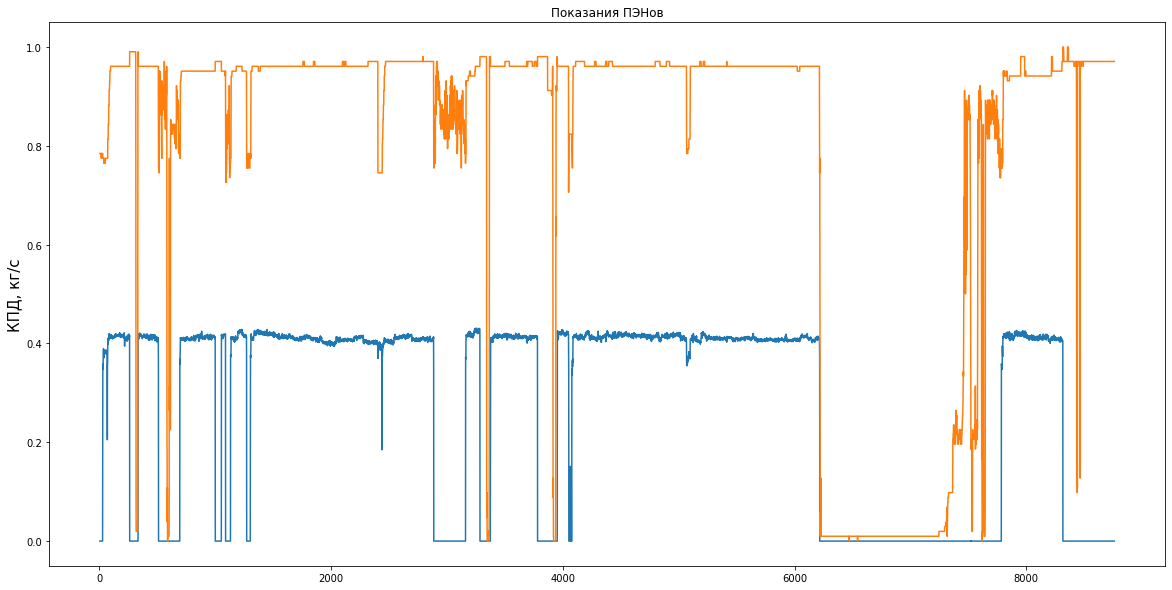

In [15]:
# plt.rcParams["figure.figsize"] = (20,10)

# # plot = pump1_eff.plot()

# plt.show()

# # pump1_eff.plot()

fig = plt.figure()


max_1 = df['10LAB11CP002_XQ01'].max()
max_2 = df['10LAB11CP002_XQ01'].min()

pump1_norm = df['10LAB11CP002_XQ01']/max_1

# for frame in [pump1_eff, pump2_eff, pump3_eff, pump4_eff, pump5_eff]:
for frame in [pump1_eff, pump1_norm]:
    plt.plot(frame)

# plot = plt.plot([pump1_eff, pump2_eff])
plt.title('Показания ПЭНов')
plt.ylabel('КПД, кг/с', fontsize=15)
plt.legend(lines, ['first', 'second', 'third'], loc='lower right')
    
plt.show()



In [ ]:
np.corrcoef(df1.to_numpy()[:], pump1_eff.to_numpy()[:])